In [4]:
import pandas as pd

import seaborn as sns

In [5]:
df = pd.read_csv('../data/fake_job_postings.csv')
df2 = df.groupby('function', as_index=False).fraudulent.sum().sort_values(by='fraudulent', ascending=False)
df2

,function,fraudulent
1,Administrative,119
12,Engineering,113
7,Customer Service,67
31,Sales,41
18,Information Technology,32
23,Other,32
0,Accounting/Auditing,29
13,Finance,15
5,Business Development,13
22,Marketing,10


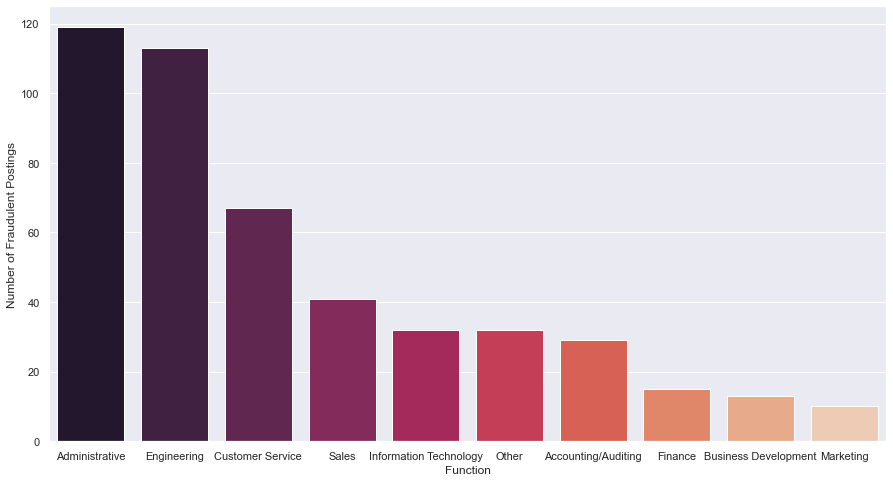

In [26]:
sns.set_theme()
df2 = df2.rename(columns={'fraudulent':'Number of Fraudulent Postings', 'function':'Function'})
_ = sns.barplot(data=df2[:10], x='Function', y='Number of Fraudulent Postings', ci=None, palette="rocket")
_.figure.set_size_inches(15,8)

In [22]:
# Import package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

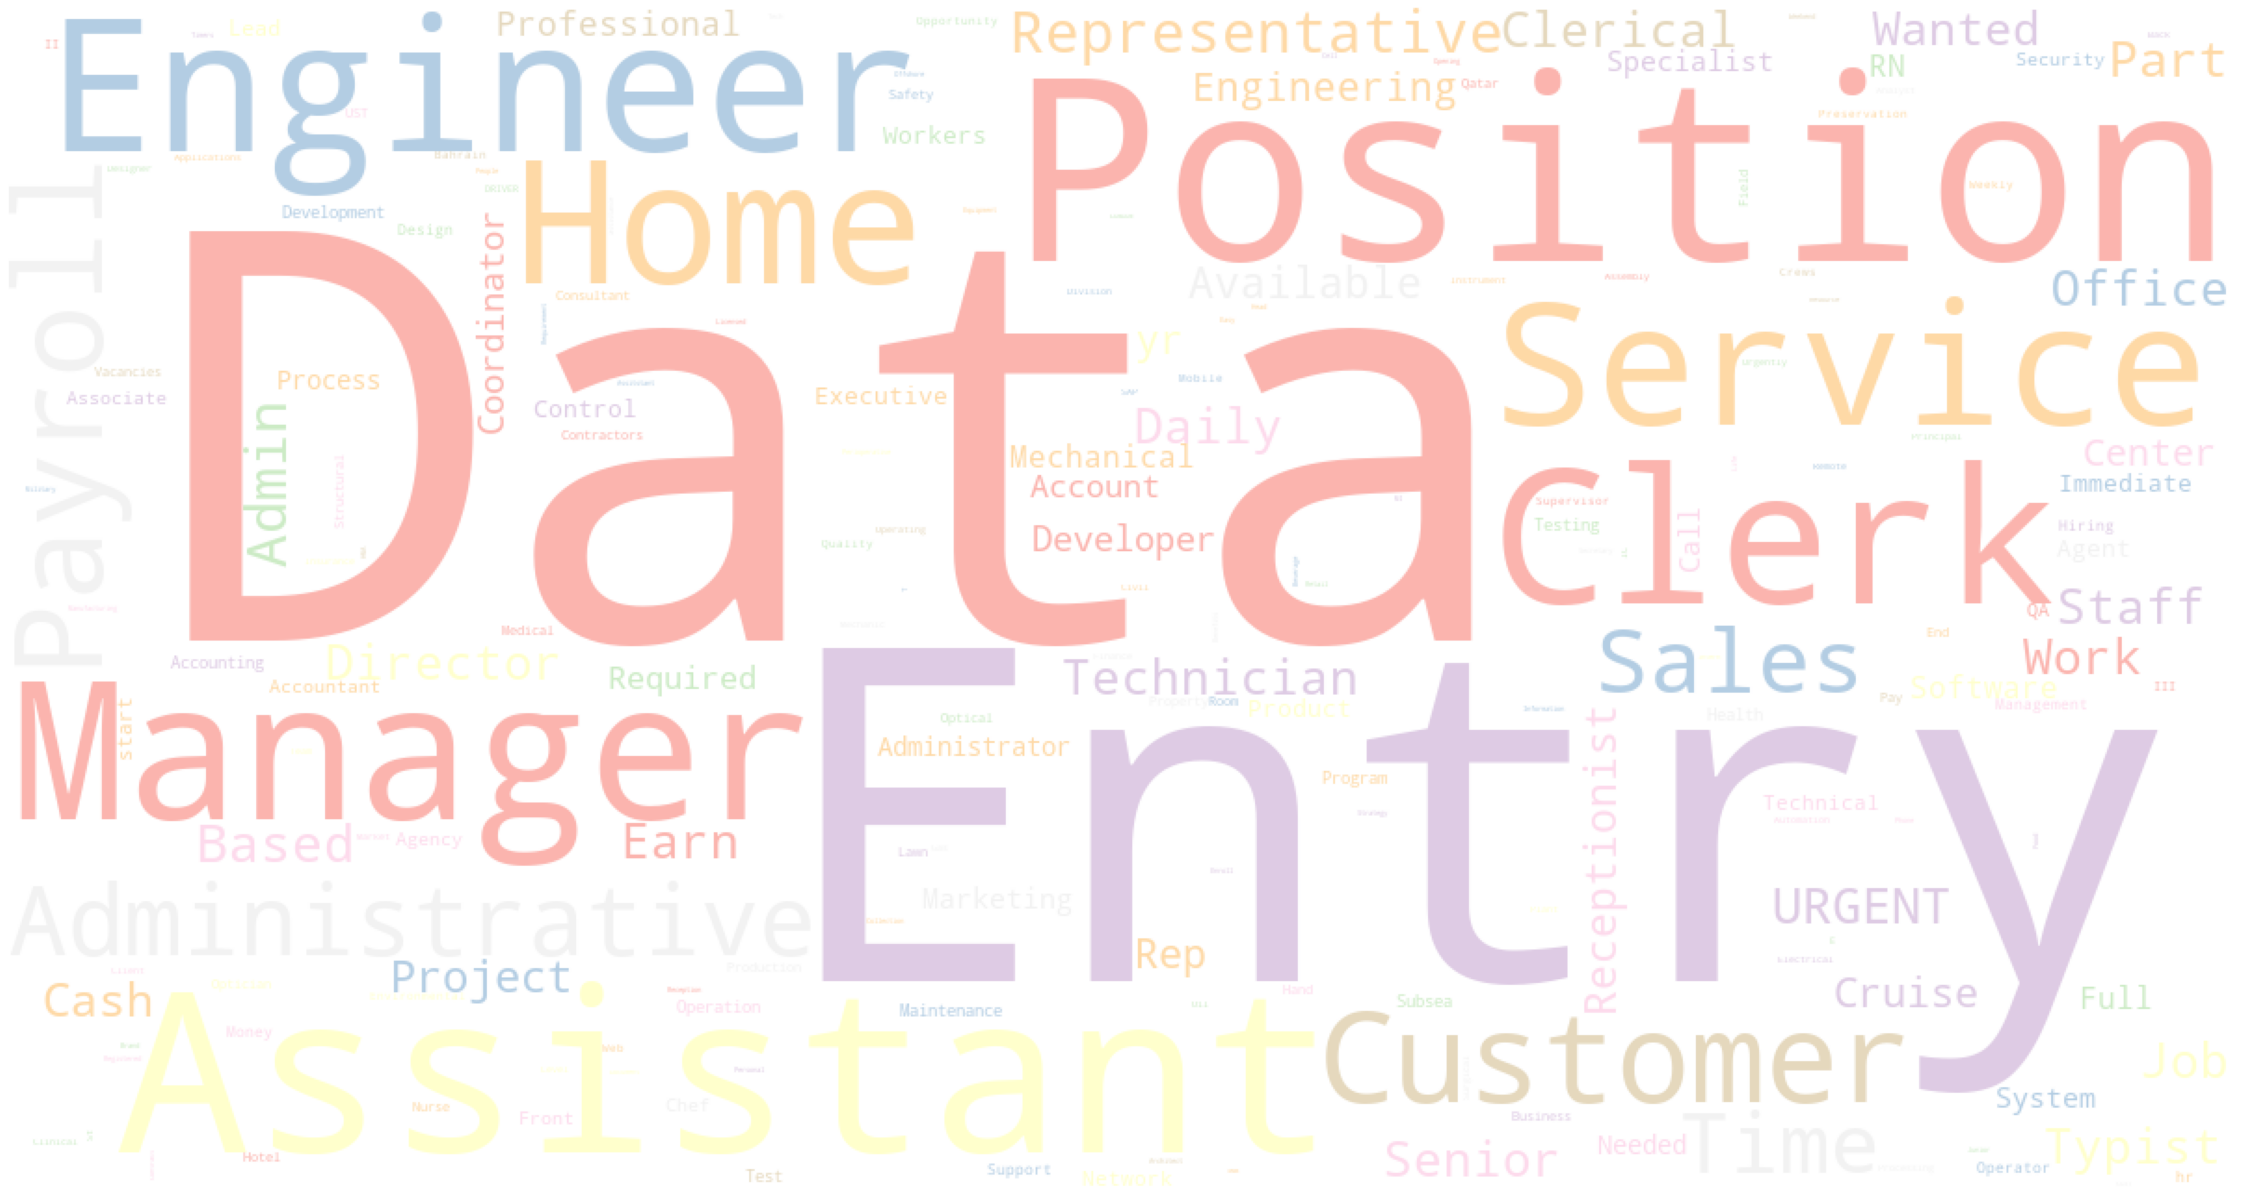

In [30]:
text = df.loc[df.fraudulent == 1, 'title']
text = ' '.join(list(text))

# Generate word cloud
wordcloud = WordCloud(width= 1200, height = 640, random_state=1, background_color='white', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [1]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
df['text'] = df['company_profile'] + df['description'] + df['requirements']

In [24]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
text                       0
dtype: int64

In [32]:
neg = df[df.fraudulent == 0]
pos = df[df.fraudulent == 1].sample(n=len(neg), replace=True, random_state=42)
df = pd.concat([neg, pos])
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows

In [33]:
df[['text','fraudulent']].rename(columns={'fraudulent':'label'}).sample(5000).dropna().to_csv('sample.csv', index=False)

In [35]:
tmp.dropna().to_csv('sample.csv', index=False)

In [34]:
tmp = pd.read_csv('sample.csv')
tmp.isna().sum()

text     2369
label       0
dtype: int64

In [39]:
from datasets import load_dataset
df = load_dataset("csv", data_files="sample.csv")

ImportError: DLL load failed: The specified procedure could not be found.